In [151]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

cust_data = pd.read_csv("marketing_campaign.csv",delimiter='\t')
cust_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [152]:
def clean(data):
        data['Education'] = np.where(data['Education'] == 'Basic',0,np.where(data['Education'] == '2n Cycle',1,np.where(data['Education'] == 'Graduation',2,np.where(data['Education'] == 'Master',3,np.where(data['Education'] == 'PhD',4,0)))))
        cust_data = data
        data['Marital_Status'] = np.where(data['Marital_Status'] == 'Alone',0,np.where(data['Marital_Status'] == 'Single',0,np.where(data['Marital_Status'] == 'Divorced',1,np.where(data['Marital_Status'] == 'Widow',2,np.where(data['Marital_Status'] == 'Together',3,np.where(data['Marital_Status'] == 'Married',4,0))))))
        data['Education'] = data['Education'].fillna(0)
        data['Marital_status'] = data['Marital_Status'].fillna(0)
        columns = data.columns
        for x in columns:
           data[x] = data[x].fillna(0)
        cust_data = data

In [153]:
clean(cust_data)
# Made the Null into Basic education and single because that's the least influential options/base, cleaned the data using one hot encoding and standard scalar.

In [154]:
columns = cust_data.columns
for x in columns:
    print(pd.isnull(cust_data[x]))
    

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: ID, Length: 2240, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Year_Birth, Length: 2240, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Education, Length: 2240, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Marital_Status, Length: 2240, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool
0       False
1    

In [155]:
def kmeans(data):
    inertias = []
    distortions = []
    X = cust_data.drop('ID',axis = 1)
    X = X.drop('Dt_Customer', axis=1)
    y = cust_data['ID']
    for k in range(1,10):
        model = KMeans(n_clusters=k).fit(X)
        distance = cdist(X, model.cluster_centers_,
                                  'euclidean')
        distortion = sum(np.min(distance,axis =1))/X.shape[0]
        distortions.append(distortion)
        inertia = model.inertia_
        inertias.append(inertia)
    plt.plot(range(1,10),inertias)
    plt.title('Elbow Method with Inertia')

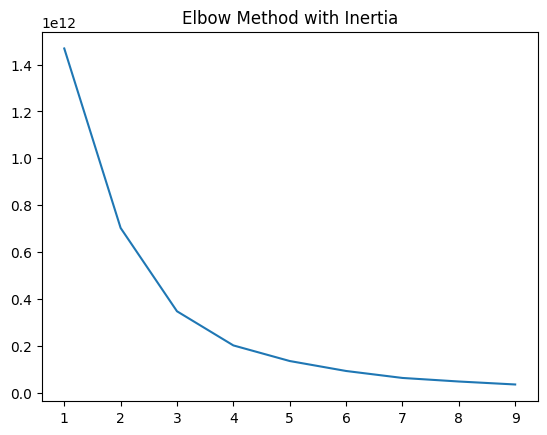

In [156]:
kmeans(cust_data)
# Three is the ideal number of clusters based on inertia and distortion where the curve is the sharpest.

In [157]:
def hclustering(data):
    X = cust_data.drop('ID',axis = 1)
    X = X.drop('Dt_Customer', axis=1)
    y = cust_data['ID']
    linked = linkage(X,'ward')
    plt.figure(figsize=(10,7))
    dendro = dendrogram(linked,labels= list(y))

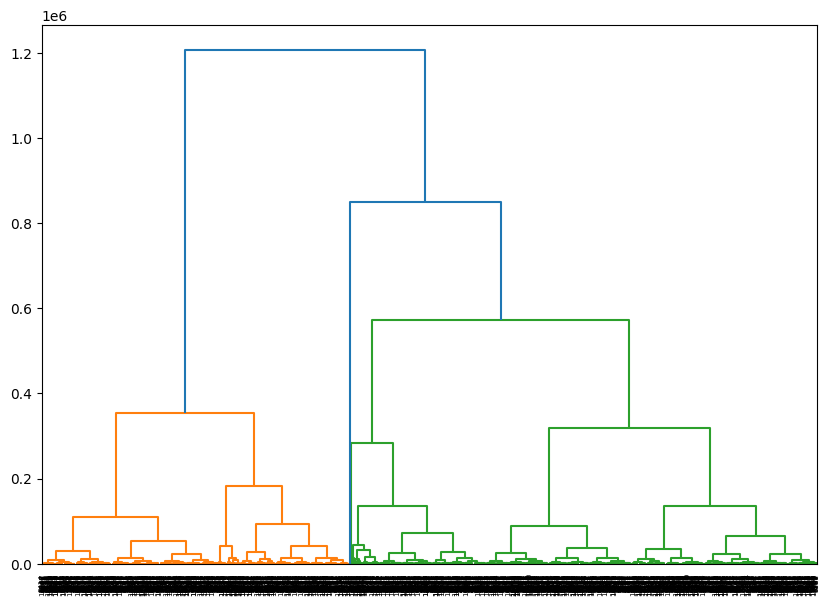

In [159]:
hclustering(cust_data)

In [ ]:
#Three is the optimal amount of clustering based on the plot. Three has the largest distance between the top compared to all other amount of clusters. 

In [ ]:
# I think that heirarchal clustering is a better approach as it shows the differences between the groups better and how they're grouped together. 